In [2]:
from datetime import datetime
import MetaTrader5 as mt5
import pandas as pd

In [3]:
mt5.initialize()

True

In [4]:
# date from 2023.04.24
date_from = datetime(2023, 4, 20)

In [7]:
rates=mt5.copy_rates_from(
   "XAUUSD",      
   mt5.TIMEFRAME_M3,    
   date_from,    
   20000        
   )

In [8]:
count=0
for rate in rates:
    print(rate)
    count+=1

count


(1676975220, 1833.67, 1833.91, 1832.63, 1832.75, 364, 7, 0)
(1676975400, 1832.67, 1832.9, 1831.27, 1831.59, 516, 5, 0)
(1676975580, 1831.59, 1832.49, 1831.35, 1832.49, 401, 6, 0)
(1676975760, 1832.49, 1832.56, 1831.41, 1831.46, 410, 8, 0)
(1676975940, 1831.45, 1832.24, 1831.13, 1831.73, 434, 8, 0)
(1676976120, 1831.75, 1831.99, 1831.19, 1831.76, 290, 8, 0)
(1676976300, 1831.76, 1832.15, 1831.28, 1831.78, 333, 8, 0)
(1676976480, 1831.75, 1833.26, 1831.08, 1833.11, 376, 8, 0)
(1676976660, 1833.15, 1833.15, 1831.52, 1832.1, 359, 8, 0)
(1676976840, 1832.1, 1834.84, 1832.1, 1834.83, 393, 7, 0)
(1676977020, 1834.83, 1835.93, 1834.38, 1834.82, 603, 7, 0)
(1676977200, 1834.8, 1834.82, 1832.92, 1833.05, 373, 7, 0)
(1676977380, 1833.07, 1834.01, 1832.75, 1833.99, 334, 8, 0)
(1676977560, 1834., 1834.51, 1833.07, 1834.29, 416, 7, 0)
(1676977740, 1834.29, 1835.02, 1834.04, 1834.66, 364, 7, 0)
(1676977920, 1834.66, 1834.85, 1834.06, 1834.11, 289, 8, 0)
(1676978100, 1834.1, 1834.74, 1833.91, 1834.59,

20000

In [9]:
rates_frame=pd.DataFrame(rates)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [10]:
print(rates_frame)

                     time     open     high      low    close  tick_volume  \
0     2023-02-21 10:27:00  1833.67  1833.91  1832.63  1832.75          364   
1     2023-02-21 10:30:00  1832.67  1832.90  1831.27  1831.59          516   
2     2023-02-21 10:33:00  1831.59  1832.49  1831.35  1832.49          401   
3     2023-02-21 10:36:00  1832.49  1832.56  1831.41  1831.46          410   
4     2023-02-21 10:39:00  1831.45  1832.24  1831.13  1831.73          434   
...                   ...      ...      ...      ...      ...          ...   
19995 2023-04-25 03:00:00  1995.04  1995.22  1994.69  1995.22          225   
19996 2023-04-25 03:03:00  1995.20  1995.41  1994.93  1995.25          118   
19997 2023-04-25 03:06:00  1995.25  1995.26  1994.52  1994.77          111   
19998 2023-04-25 03:09:00  1994.76  1995.01  1994.28  1994.32          133   
19999 2023-04-25 03:12:00  1994.32  1994.33  1993.56  1993.60          164   

       spread  real_volume  
0           7            0  
1    

In [11]:
rates_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         20000 non-null  datetime64[ns]
 1   open         20000 non-null  float64       
 2   high         20000 non-null  float64       
 3   low          20000 non-null  float64       
 4   close        20000 non-null  float64       
 5   tick_volume  20000 non-null  uint64        
 6   spread       20000 non-null  int32         
 7   real_volume  20000 non-null  uint64        
dtypes: datetime64[ns](1), float64(4), int32(1), uint64(2)
memory usage: 1.1 MB


In [12]:
rates_frame.describe()

,open,high,low,close,tick_volume,spread,real_volume
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0
mean,1931.140763,1931.684774,1930.600964,1931.148090,321.081200,8.707650,0.0
std,74.598307,74.643524,74.547804,74.598648,232.165366,3.859602,0.0
min,1806.800000,1807.410000,1804.690000,1806.790000,2.000000,0.000000,0.0
25%,1841.320000,1841.992500,1840.662500,1841.337500,164.000000,8.000000,0.0
50%,1963.700000,1964.290000,1963.210000,1963.720000,260.000000,8.000000,0.0
75%,1993.370000,1993.980000,1992.712500,1993.380000,408.000000,8.000000,0.0
max,2047.250000,2048.670000,2046.750000,2047.270000,1579.000000,230.000000,0.0


In [12]:
#find ATR of dataframe

import talib

atr = talib.ATR(rates_frame['high'], rates_frame['low'], rates_frame['close'], timeperiod=14)

print(atr)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9995    0.564589
9996    0.552832
9997    0.562630
9998    0.588871
9999    0.581809
Length: 10000, dtype: float64


In [17]:
rates_frame.drop(['supertrend'], axis=1, inplace=True)

In [18]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0
...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0


In [19]:
#find supertrend of dataframe using atr
import talib
import pandas as pd

# define the parameters
period = 10
multiplier = 3

# load the data into a pandas DataFrame
data = rates_frame
close_prices = data['close']

# calculate the Supertrend
upper_band, lower_band = talib.SMA(close_prices, period), talib.SMA(close_prices, period)
atr = talib.ATR(data['high'], data['low'], close_prices, period)
for i in range(period, len(close_prices)):
    current_high = data['high'][i]
    current_low = data['low'][i]
    previous_close = close_prices[i - 1]
    previous_upper_band = upper_band[i - 1]
    previous_lower_band = lower_band[i - 1]

    if previous_close > previous_upper_band:
        upper_band[i] = max(previous_upper_band, current_high - (multiplier * atr[i]))
    else:
        upper_band[i] = previous_upper_band

    if previous_close < previous_lower_band:
        lower_band[i] = min(previous_lower_band, current_low + (multiplier * atr[i]))
    else:
        lower_band[i] = previous_lower_band

    if i == period:
        supertrend = pd.Series(upper_band - ((upper_band - lower_band) / 2), name='Supertrend')
    else:
        supertrend[i] = supertrend[i - 1]
        if supertrend[i - 1] == upper_band[i - 1] and close_prices[i] <= upper_band[i]:
            supertrend[i] = upper_band[i]
        elif supertrend[i - 1] == upper_band[i - 1] and close_prices[i] > upper_band[i]:
            supertrend[i] = lower_band[i]
        elif supertrend[i - 1] == lower_band[i - 1] and close_prices[i] >= lower_band[i]:
            supertrend[i] = lower_band[i]
        elif supertrend[i - 1] == lower_band[i - 1] and close_prices[i] < lower_band[i]:
            supertrend[i] = upper_band[i]

# add the Supertrend to the DataFrame
data['supertrend'] = supertrend

# print the Supertrend values
print(data['supertrend'])




                 time     open     high      low    close  tick_volume  \
0 2023-03-22 03:51:00  1944.25  1945.26  1944.25  1944.86          229   
1 2023-03-22 03:54:00  1944.88  1945.08  1944.14  1944.18          219   
2 2023-03-22 03:57:00  1944.18  1944.20  1943.71  1943.93          150   
3 2023-03-22 04:00:00  1943.91  1943.91  1941.38  1941.48          310   
4 2023-03-22 04:03:00  1941.48  1941.96  1940.68  1941.15          375   

   spread  real_volume  supertrend  upper Band  lower Band  
0       8            0         0.0         NaN         NaN  
1       8            0         0.0         NaN         NaN  
2       8            0         0.0         NaN         NaN  
3       5            0         0.0         NaN         NaN  
4       8            0         0.0         NaN         NaN  


In [20]:
data.head(30)

,time,open,high,low,close,tick_volume,spread,real_volume,supertrend,upper Band,lower Band
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,0.0,NaN,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,0.0,NaN,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,0.0,NaN,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,0.0,NaN,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,0.0,NaN,NaN
5,2023-03-22 04:06:00,1941.14,1941.23,1940.12,1940.68,299,8,0,0.0,NaN,NaN
6,2023-03-22 04:09:00,1940.71,1941.34,1940.28,1940.67,255,8,0,0.0,NaN,NaN
7,2023-03-22 04:12:00,1940.69,1941.53,1940.67,1941.39,178,8,0,0.0,NaN,NaN
8,2023-03-22 04:15:00,1941.39,1941.54,1940.86,1940.94,136,8,0,0.0,NaN,NaN
9,2023-03-22 04:18:00,1940.94,1941.06,1940.49,1940.96,148,8,0,0.0,1942.024,1942.024000


In [21]:
new_df = rates_frame

In [23]:
import talib
import pandas as pd

# Define Supertrend parameters
period = 10
multiplier = 3

# Load data from CSV file
data = new_df

# Calculate Supertrend values
close_prices = data['close']
upper_band, lower_band = talib.SMA(close_prices, period), talib.SMA(close_prices, period)
atr = talib.ATR(data['high'], data['low'], close_prices, period)

for i in range(period, len(close_prices)):
    current_high = data['high'][i]
    current_low = data['low'][i]
    previous_close = close_prices[i - 1]
    previous_upper_band = upper_band[i - 1]
    previous_lower_band = lower_band[i - 1]

    if previous_close > previous_upper_band:
        upper_band[i] = max(previous_upper_band, current_high - (multiplier * atr[i]))
    else:
        upper_band[i] = previous_upper_band

    if previous_close < previous_lower_band:
        lower_band[i] = min(previous_lower_band, current_low + (multiplier * atr[i]))
    else:
        lower_band[i] = previous_lower_band

supertrend = pd.Series(0.0, index=data.index)
for i in range(period, len(close_prices)):
    previous_supertrend = supertrend[i - 1]
    previous_upper_band = upper_band[i - 1]
    previous_lower_band = lower_band[i - 1]

    if previous_supertrend == previous_upper_band and close_prices[i] <= upper_band[i]:
        supertrend[i] = upper_band[i]
    elif previous_supertrend == previous_upper_band and close_prices[i] > upper_band[i]:
        supertrend[i] = lower_band[i]
    elif previous_supertrend == previous_lower_band and close_prices[i] >= lower_band[i]:
        supertrend[i] = lower_band[i]
    elif previous_supertrend == previous_lower_band and close_prices[i] < lower_band[i]:
        supertrend[i] = upper_band[i]

# Add Supertrend, upper band, and lower band to DataFrame
data['Upper Band'] = upper_band
data['Lower Band'] = lower_band
data['Supertrend'] = supertrend

print(data.head(30))


                 time     open     high      low    close  tick_volume  \
0 2023-03-22 03:51:00  1944.25  1945.26  1944.25  1944.86          229   
1 2023-03-22 03:54:00  1944.88  1945.08  1944.14  1944.18          219   
2 2023-03-22 03:57:00  1944.18  1944.20  1943.71  1943.93          150   
3 2023-03-22 04:00:00  1943.91  1943.91  1941.38  1941.48          310   
4 2023-03-22 04:03:00  1941.48  1941.96  1940.68  1941.15          375   

   spread  real_volume  supertrend  upper Band  lower Band  Upper Band  \
0       8            0         0.0         NaN         NaN         NaN   
1       8            0         0.0         NaN         NaN         NaN   
2       8            0         0.0         NaN         NaN         NaN   
3       5            0         0.0         NaN         NaN         NaN   
4       8            0         0.0         NaN         NaN         NaN   

   Lower Band  Supertrend  
0         NaN         0.0  
1         NaN         0.0  
2         NaN         0.0 

In [32]:
new_df

,time,open,high,low,close,tick_volume,spread,real_volume,supertrend,upper Band,lower Band,Upper Band,Lower Band,Supertrend
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,0.0,NaN,NaN,NaN,NaN,0.0
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,0.0,NaN,NaN,NaN,NaN,0.0
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,0.0,NaN,NaN,NaN,NaN,0.0
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,0.0,NaN,NaN,NaN,NaN,0.0
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0,0.0,2045.052841,1938.984926,2045.052841,1938.984926,0.0
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0,0.0,2045.052841,1938.984926,2045.052841,1938.984926,0.0
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0,0.0,2045.052841,1938.984926,2045.052841,1938.984926,0.0
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0,0.0,2045.052841,1938.984926,2045.052841,1938.984926,0.0


In [34]:
new_df.drop(['supertrend', 'upper Band', 'lower Band','Upper Band','Lower Band'], axis=1, inplace=True)

In [36]:
new_df.drop(['Supertrend'], axis=1, inplace=True)

In [37]:
new_df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0
...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0


In [38]:
#find supertrend of dataframe using atr
import talib
import pandas as pd

# define the parameters
period = 10
multiplier = 3

# load the data into a pandas DataFrame
data = new_df
close_prices = data['close']

# calculate the Supertrend
upper_band, lower_band = talib.SMA(close_prices, period), talib.SMA(close_prices, period)
atr = talib.ATR(data['high'], data['low'], close_prices, period)
for i in range(period, len(close_prices)):
    current_high = data['high'][i]
    current_low = data['low'][i]
    previous_close = close_prices[i - 1]
    previous_upper_band = upper_band[i - 1]
    previous_lower_band = lower_band[i - 1]

    if previous_close > previous_upper_band:
        upper_band[i] = max(previous_upper_band, current_high - (multiplier * atr[i]))
    else:
        upper_band[i] = previous_upper_band

    if previous_close < previous_lower_band:
        lower_band[i] = min(previous_lower_band, current_low + (multiplier * atr[i]))
    else:
        lower_band[i] = previous_lower_band

    if i == period:
        supertrend = pd.Series(upper_band - ((upper_band - lower_band) / 2), name='Supertrend')
    else:
        supertrend[i] = supertrend[i - 1]
        if supertrend[i - 1] == upper_band[i - 1] and close_prices[i] <= upper_band[i]:
            supertrend[i] = upper_band[i]
        elif supertrend[i - 1] == upper_band[i - 1] and close_prices[i] > upper_band[i]:
            supertrend[i] = lower_band[i]
        elif supertrend[i - 1] == lower_band[i - 1] and close_prices[i] >= lower_band[i]:
            supertrend[i] = lower_band[i]
        elif supertrend[i - 1] == lower_band[i - 1] and close_prices[i] < lower_band[i]:
            supertrend[i] = upper_band[i]

# add the Supertrend to the DataFrame
data['supertrend'] = supertrend

# print the Supertrend values
print(data['supertrend'])


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
9995    1938.984926
9996    1938.984926
9997    1938.984926
9998    1938.984926
9999    1938.984926
Name: supertrend, Length: 10000, dtype: float64


In [40]:
data.head(30)

,time,open,high,low,close,tick_volume,spread,real_volume,supertrend
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN
5,2023-03-22 04:06:00,1941.14,1941.23,1940.12,1940.68,299,8,0,NaN
6,2023-03-22 04:09:00,1940.71,1941.34,1940.28,1940.67,255,8,0,NaN
7,2023-03-22 04:12:00,1940.69,1941.53,1940.67,1941.39,178,8,0,NaN
8,2023-03-22 04:15:00,1941.39,1941.54,1940.86,1940.94,136,8,0,NaN
9,2023-03-22 04:18:00,1940.94,1941.06,1940.49,1940.96,148,8,0,1942.024


In [41]:
import talib
import pandas as pd

# Define Supertrend parameters
period = 10
multiplier = 3

# Load data from CSV file
data = data

# Calculate Supertrend values
close_prices = data['close']
upper_band, lower_band = talib.SMA(close_prices, period), talib.SMA(close_prices, period)
atr = talib.ATR(data['high'], data['low'], close_prices, period)

for i in range(period, len(close_prices)):
    current_high = data['high'][i]
    current_low = data['low'][i]
    previous_close = close_prices[i - 1]
    previous_upper_band = upper_band[i - 1]
    previous_lower_band = lower_band[i - 1]

    if previous_close > previous_upper_band:
        upper_band[i] = max(previous_upper_band, current_high - (multiplier * atr[i]))
    else:
        upper_band[i] = previous_upper_band

    if previous_close < previous_lower_band:
        lower_band[i] = min(previous_lower_band, current_low + (multiplier * atr[i]))
    else:
        lower_band[i] = previous_lower_band

supertrend = pd.Series(0.0, index=data.index)
for i in range(period, len(close_prices)):
    previous_supertrend = supertrend[i - 1]
    previous_upper_band = upper_band[i - 1]
    previous_lower_band = lower_band[i - 1]
    
    print(f"i = {i}, previous_supertrend = {previous_supertrend}, previous_upper_band = {previous_upper_band}, previous_lower_band = {previous_lower_band}")

    if previous_supertrend == previous_upper_band and close_prices[i] <= upper_band[i]:
        supertrend[i] = upper_band[i]
    elif previous_supertrend == previous_upper_band and close_prices[i] > upper_band[i]:
        supertrend[i] = lower_band[i]
    elif previous_supertrend == previous_lower_band and close_prices[i] >= lower_band[i]:
        supertrend[i] = lower_band[i]
    elif previous_supertrend == previous_lower_band and close_prices[i] < lower_band[i]:
        supertrend[i] = upper_band[i]

# Add Supertrend, upper band, and lower band to DataFrame
data['upper Band'] = upper_band
data['lower Band'] = lower_band



i = 10, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 11, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 12, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 13, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 14, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 15, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 16, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 17, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 18, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 19, previous_supertrend = 0.0, previous_upper_band = 1942.024, previous_lower_band = 1942.024
i = 20, previous_sup

In [44]:
data.head(20)

,time,open,high,low,close,tick_volume,spread,real_volume,supertrend,upper Band,lower Band
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN,NaN,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN,NaN,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN,NaN,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN,NaN,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN,NaN,NaN
5,2023-03-22 04:06:00,1941.14,1941.23,1940.12,1940.68,299,8,0,NaN,NaN,NaN
6,2023-03-22 04:09:00,1940.71,1941.34,1940.28,1940.67,255,8,0,NaN,NaN,NaN
7,2023-03-22 04:12:00,1940.69,1941.53,1940.67,1941.39,178,8,0,NaN,NaN,NaN
8,2023-03-22 04:15:00,1941.39,1941.54,1940.86,1940.94,136,8,0,NaN,NaN,NaN
9,2023-03-22 04:18:00,1940.94,1941.06,1940.49,1940.96,148,8,0,1942.024,1942.024,1942.024


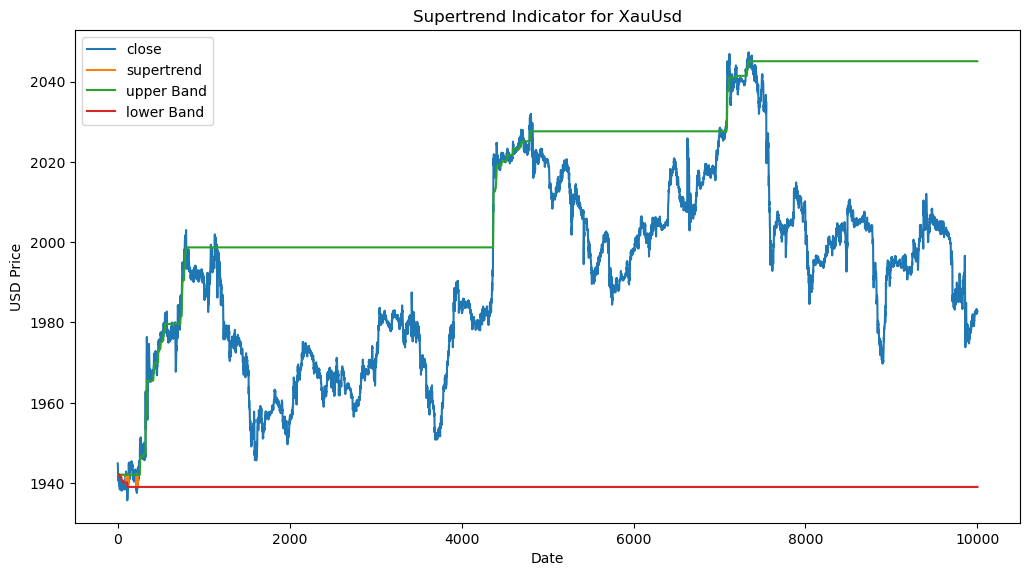

In [45]:
#plot data with supertrend
import matplotlib.pyplot as plt


plot_data = data[['close', 'supertrend', 'upper Band', 'lower Band']]

plot_data.plot(figsize=(12.2, 6.4))
plt.title('Supertrend Indicator for XauUsd')

plt.xlabel('Date')
plt.ylabel('USD Price')
plt.show()

In [23]:
import pandas as pd
import numpy as np
import talib

def supertrend(data, atr_period=10, multiplier=3):
    # Calculate True Range
    data['TR'] = talib.TRANGE(data['high'].values, data['low'].values, data['close'].values)
    
    # Calculate Average True Range
    data['ATR'] = talib.SMA(data['TR'].values, timeperiod=atr_period)
    
    # Calculate Supertrend Upper and Lower Bands
    data['upper'] = ((data['high'] + data['low']) / 2) + (multiplier * data['ATR'])
    data['lower'] = ((data['high'] + data['low']) / 2) - (multiplier * data['ATR'])
    
    # Initialize Supertrend Column
    data['supertrend'] = np.nan
    
    for i in range(atr_period, len(data)):
        if data['close'][i] > data['upper'][i - 1]:
            data.loc[i, 'supertrend'] = data['lower'][i]
        elif data['close'][i] < data['lower'][i - 1]:
            data.loc[i, 'supertrend'] = data['upper'][i]
        else:
            if data['supertrend'][i - 1] == data['upper'][i - 1] and data['close'][i] <= data['upper'][i]:
                data.loc[i, 'supertrend'] = data['upper'][i]
            elif data['supertrend'][i - 1] == data['upper'][i - 1] and data['close'][i] >= data['lower'][i]:
                data.loc[i, 'supertrend'] = data['lower'][i]
            elif data['supertrend'][i - 1] == data['lower'][i - 1] and data['close'][i] >= data['lower'][i]:
                data.loc[i, 'supertrend'] = data['lower'][i]
            elif data['supertrend'][i - 1] == data['lower'][i - 1] and data['close'][i] <= data['upper'][i]:
                data.loc[i, 'supertrend'] = data['upper'][i]
    
    # Drop unnecessary columns
    data.drop(['TR', 'ATR'], axis=1, inplace=True)
    
    return data

# Example usage
data = rates_frame  # Replace with the path to your OHLC data file
data_with_supertrend = supertrend(data)
print(data_with_supertrend.tail())


                     time     open     high      low    close  tick_volume  \
19995 2023-04-25 03:00:00  1995.04  1995.22  1994.69  1995.22          225   
19996 2023-04-25 03:03:00  1995.20  1995.41  1994.93  1995.25          118   
19997 2023-04-25 03:06:00  1995.25  1995.26  1994.52  1994.77          111   
19998 2023-04-25 03:09:00  1994.76  1995.01  1994.28  1994.32          133   
19999 2023-04-25 03:12:00  1994.32  1994.33  1993.56  1993.60          164   

       spread  real_volume     upper     lower  supertrend  
19995       7            0  1997.985  1991.925    1991.925  
19996       8            0  1998.146  1992.194    1992.194  
19997       8            0  1997.953  1991.827    1991.827  
19998       8            0  1997.042  1992.248    1992.248  
19999       7            0  1995.997  1991.893    1991.893  


In [24]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend
0,2023-02-21 10:27:00,1833.67,1833.91,1832.63,1832.75,364,7,0,NaN,NaN,NaN
1,2023-02-21 10:30:00,1832.67,1832.90,1831.27,1831.59,516,5,0,NaN,NaN,NaN
2,2023-02-21 10:33:00,1831.59,1832.49,1831.35,1832.49,401,6,0,NaN,NaN,NaN
3,2023-02-21 10:36:00,1832.49,1832.56,1831.41,1831.46,410,8,0,NaN,NaN,NaN
4,2023-02-21 10:39:00,1831.45,1832.24,1831.13,1831.73,434,8,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19995,2023-04-25 03:00:00,1995.04,1995.22,1994.69,1995.22,225,7,0,1997.985,1991.925,1991.925
19996,2023-04-25 03:03:00,1995.20,1995.41,1994.93,1995.25,118,8,0,1998.146,1992.194,1992.194
19997,2023-04-25 03:06:00,1995.25,1995.26,1994.52,1994.77,111,8,0,1997.953,1991.827,1991.827
19998,2023-04-25 03:09:00,1994.76,1995.01,1994.28,1994.32,133,8,0,1997.042,1992.248,1992.248


In [56]:
data_with_supertrend.drop(['Supertrend','supertrend'], axis=1, inplace=True)
data_with_supertrend.head(20)

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN,NaN
5,2023-03-22 04:06:00,1941.14,1941.23,1940.12,1940.68,299,8,0,NaN,NaN
6,2023-03-22 04:09:00,1940.71,1941.34,1940.28,1940.67,255,8,0,NaN,NaN
7,2023-03-22 04:12:00,1940.69,1941.53,1940.67,1941.39,178,8,0,NaN,NaN
8,2023-03-22 04:15:00,1941.39,1941.54,1940.86,1940.94,136,8,0,NaN,NaN
9,2023-03-22 04:18:00,1940.94,1941.06,1940.49,1940.96,148,8,0,NaN,NaN


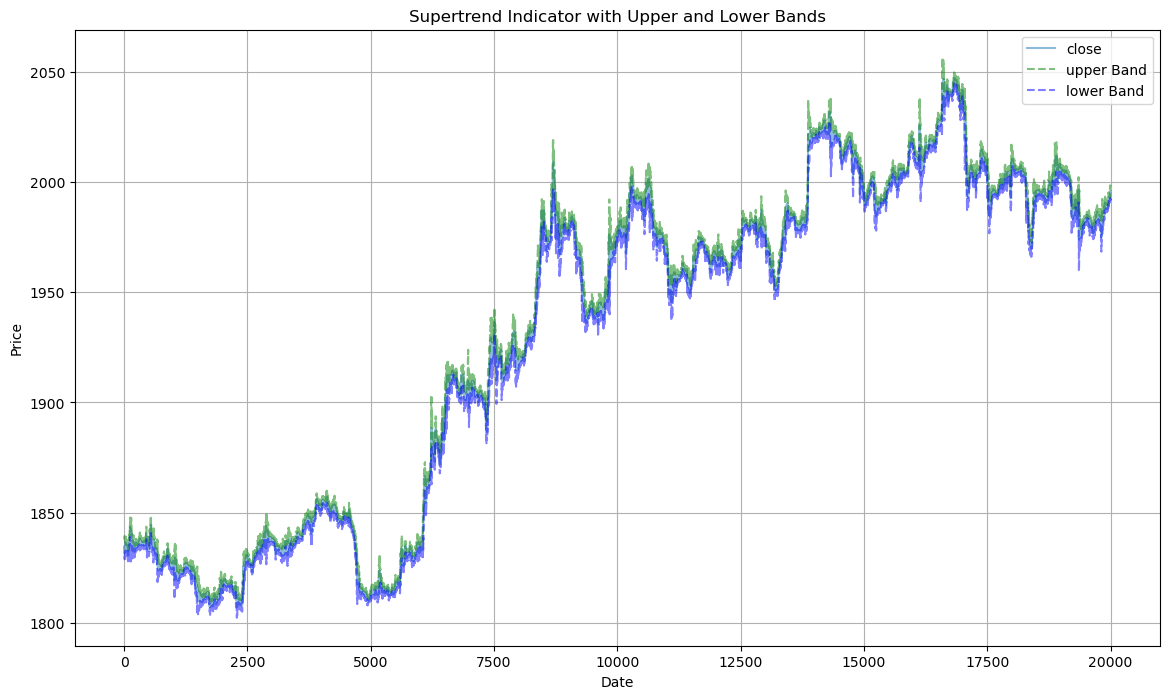

In [26]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

def plot_supertrend(data_with_supertrend):
    plt.figure(figsize=(14, 8))
    plt.plot(data_with_supertrend['close'], label='close', alpha=0.5)
    # plt.plot(data_with_supertrend['supertrend'], label='supertrend', color='red', linewidth=1.5)
    plt.plot(data_with_supertrend['upper'], label='upper Band', color='green', linestyle='--', alpha=0.5)
    plt.plot(data_with_supertrend['lower'], label='lower Band', color='blue', linestyle='--', alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Supertrend Indicator with Upper and Lower Bands')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Example usage
# data = new_df  # Replace with the path to your OHLC data file
data_with_supertrend = rates_frame
plot_supertrend(data_with_supertrend)


In [27]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend
0,2023-02-21 10:27:00,1833.67,1833.91,1832.63,1832.75,364,7,0,NaN,NaN,NaN
1,2023-02-21 10:30:00,1832.67,1832.90,1831.27,1831.59,516,5,0,NaN,NaN,NaN
2,2023-02-21 10:33:00,1831.59,1832.49,1831.35,1832.49,401,6,0,NaN,NaN,NaN
3,2023-02-21 10:36:00,1832.49,1832.56,1831.41,1831.46,410,8,0,NaN,NaN,NaN
4,2023-02-21 10:39:00,1831.45,1832.24,1831.13,1831.73,434,8,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19995,2023-04-25 03:00:00,1995.04,1995.22,1994.69,1995.22,225,7,0,1997.985,1991.925,1991.925
19996,2023-04-25 03:03:00,1995.20,1995.41,1994.93,1995.25,118,8,0,1998.146,1992.194,1992.194
19997,2023-04-25 03:06:00,1995.25,1995.26,1994.52,1994.77,111,8,0,1997.953,1991.827,1991.827
19998,2023-04-25 03:09:00,1994.76,1995.01,1994.28,1994.32,133,8,0,1997.042,1992.248,1992.248


In [92]:
new_df.drop(['SMA_200'], axis=1, inplace=True)

In [93]:
new_df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0
...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0


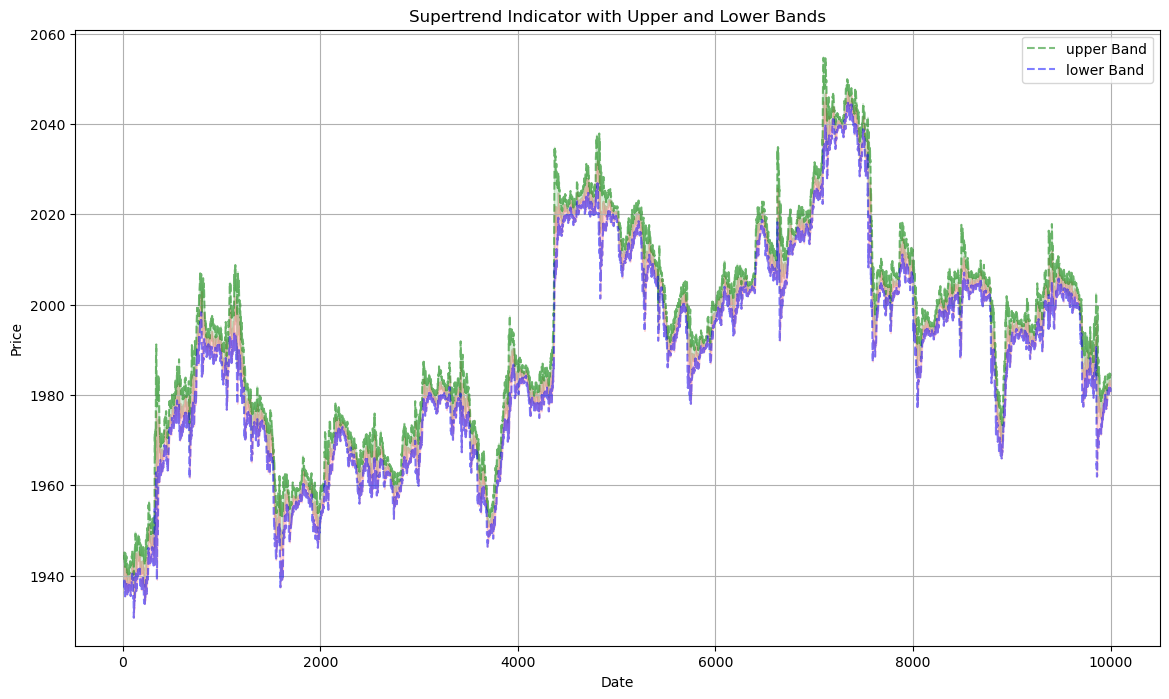

In [71]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

def plot_supertrend(data_with_supertrend):
    plt.figure(figsize=(14, 8))
    # plt.plot(data_with_supertrend['close'], label='close', alpha=0.5)
    # plt.plot(data_with_supertrend['supertrend'], label='supertrend', color='red', linewidth=1.5)
    plt.plot(data_with_supertrend['upper'], label='upper Band', color='green', linestyle='--', alpha=0.5)
    plt.plot(data_with_supertrend['lower'], label='lower Band', color='blue', linestyle='--', alpha=0.5)

    plt.fill_between(data_with_supertrend.index, data_with_supertrend['close'], data_with_supertrend['upper'],
                     where=(data_with_supertrend['close'] <= data_with_supertrend['upper']),
                     interpolate=True, color='green', alpha=0.15)

    plt.fill_between(data_with_supertrend.index, data_with_supertrend['close'], data_with_supertrend['lower'],
                     where=(data_with_supertrend['close'] >= data_with_supertrend['lower']),
                     interpolate=True, color='red', alpha=0.15)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Supertrend Indicator with Upper and Lower Bands')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Example usage
data = new_df  # Replace with the path to your OHLC data file
data_with_supertrend = supertrend(data)
plot_supertrend(data_with_supertrend)


In [74]:
def twohundredsma(data):
    data['200sma'] = data['close'].rolling(window=200).mean()
    return data





In [75]:
_200sma=twohundredsma(new_df)

_200sma

,time,open,high,low,close,tick_volume,spread,real_volume,200sma
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN
...,...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0,1982.04450
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0,1982.01460
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0,1981.98505
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0,1981.95735


In [28]:
def fibonacci_retracement_levels(data):
    high_price = data['high'].max()
    low_price = data['low'].min()

    diff = high_price - low_price

    levels = {
        '0.0%': high_price,
        '23.6%': high_price - diff * 0.236,
        '38.2%': high_price - diff * 0.382,
        '50.0%': high_price - diff * 0.5,
        '61.8%': high_price - diff * 0.618,
        '78.6%': high_price - diff * 0.786,
        '100.0%': low_price,
    }

    return levels


In [30]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend
0,2023-02-21 10:27:00,1833.67,1833.91,1832.63,1832.75,364,7,0,NaN,NaN,NaN
1,2023-02-21 10:30:00,1832.67,1832.90,1831.27,1831.59,516,5,0,NaN,NaN,NaN
2,2023-02-21 10:33:00,1831.59,1832.49,1831.35,1832.49,401,6,0,NaN,NaN,NaN
3,2023-02-21 10:36:00,1832.49,1832.56,1831.41,1831.46,410,8,0,NaN,NaN,NaN
4,2023-02-21 10:39:00,1831.45,1832.24,1831.13,1831.73,434,8,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19995,2023-04-25 03:00:00,1995.04,1995.22,1994.69,1995.22,225,7,0,1997.985,1991.925,1991.925
19996,2023-04-25 03:03:00,1995.20,1995.41,1994.93,1995.25,118,8,0,1998.146,1992.194,1992.194
19997,2023-04-25 03:06:00,1995.25,1995.26,1994.52,1994.77,111,8,0,1997.953,1991.827,1991.827
19998,2023-04-25 03:09:00,1994.76,1995.01,1994.28,1994.32,133,8,0,1997.042,1992.248,1992.248


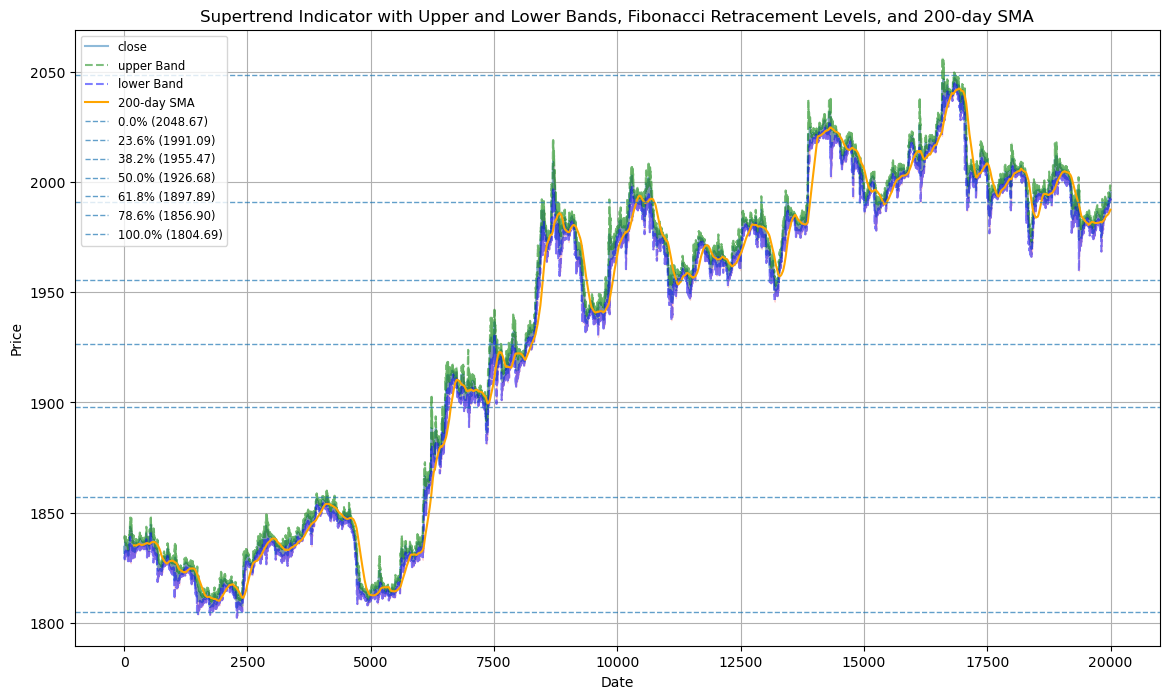

In [32]:
def plot_supertrend(data_with_supertrend, retracement_levels, sma_200):
    plt.figure(figsize=(14, 8))
    plt.plot(data_with_supertrend['close'], label='close', alpha=0.5)
    # plt.plot(data_with_supertrend['supertrend'], label='supertrend', color='red', linewidth=1.5)
    plt.plot(data_with_supertrend['upper'], label='upper Band', color='green', linestyle='--', alpha=0.5)
    plt.plot(data_with_supertrend['lower'], label='lower Band', color='blue', linestyle='--', alpha=0.5)
    plt.plot(sma_200, label='200-day SMA', color='orange', linewidth=1.5)

    plt.fill_between(data_with_supertrend.index, data_with_supertrend['close'], data_with_supertrend['upper'],
                     where=(data_with_supertrend['close'] <= data_with_supertrend['upper']),
                     interpolate=True, color='green', alpha=0.15)

    plt.fill_between(data_with_supertrend.index, data_with_supertrend['close'], data_with_supertrend['lower'],
                     where=(data_with_supertrend['close'] >= data_with_supertrend['lower']),
                     interpolate=True, color='red', alpha=0.15)

    for level, value in retracement_levels.items():
        plt.axhline(value, linestyle='--', linewidth=1, alpha=0.7, label=f'{level} ({value:.2f})')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Supertrend Indicator with Upper and Lower Bands, Fibonacci Retracement Levels, and 200-day SMA')
    plt.legend(loc='best', fontsize='small')
    plt.grid(True)
    plt.show()

# Example usage
# data = new_df  # Replace with the path to your OHLC data file
data_with_supertrend = rates_frame
data_with_supertrend['SMA_200'] = talib.SMA(data_with_supertrend['close'].values, timeperiod=200)
retracement_levels = fibonacci_retracement_levels(data_with_supertrend)
plot_supertrend(data_with_supertrend, retracement_levels, data_with_supertrend['SMA_200'])


In [33]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200
0,2023-02-21 10:27:00,1833.67,1833.91,1832.63,1832.75,364,7,0,NaN,NaN,NaN,NaN
1,2023-02-21 10:30:00,1832.67,1832.90,1831.27,1831.59,516,5,0,NaN,NaN,NaN,NaN
2,2023-02-21 10:33:00,1831.59,1832.49,1831.35,1832.49,401,6,0,NaN,NaN,NaN,NaN
3,2023-02-21 10:36:00,1832.49,1832.56,1831.41,1831.46,410,8,0,NaN,NaN,NaN,NaN
4,2023-02-21 10:39:00,1831.45,1832.24,1831.13,1831.73,434,8,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2023-04-25 03:00:00,1995.04,1995.22,1994.69,1995.22,225,7,0,1997.985,1991.925,1991.925,1987.30245
19996,2023-04-25 03:03:00,1995.20,1995.41,1994.93,1995.25,118,8,0,1998.146,1992.194,1992.194,1987.35920
19997,2023-04-25 03:06:00,1995.25,1995.26,1994.52,1994.77,111,8,0,1997.953,1991.827,1991.827,1987.41195
19998,2023-04-25 03:09:00,1994.76,1995.01,1994.28,1994.32,133,8,0,1997.042,1992.248,1992.248,1987.46000


In [110]:
def generate_trade_signals(data, sma_column='SMA_200'):
    data['signal'] = None
    start_index = data[sma_column].first_valid_index() + 1

    for i in range(start_index, len(data)):
        if data.loc[i, 'close'] > data.loc[i, sma_column] and data.loc[i - 1, 'close'] <= data.loc[i - 1, sma_column]:
            data.loc[i, 'signal'] = 'Long'
        elif data.loc[i, 'close'] < data.loc[i, sma_column] and data.loc[i - 1, 'close'] >= data.loc[i - 1, sma_column]:
            data.loc[i, 'signal'] = 'Short'

    return data



In [111]:
data_with_signals = generate_trade_signals(data_with_supertrend, sma_column='SMA_200')
print(data_with_signals[['close', 'SMA_200', 'signal']].tail(10))



        close     SMA_200 signal
9990  1983.33  1982.25160   None
9991  1982.65  1982.22015   None
9992  1982.28  1982.17940   None
9993  1982.31  1982.13010   None
9994  1982.17  1982.08605   None
9995  1982.61  1982.04450   None
9996  1982.99  1982.01460   None
9997  1982.92  1981.98505   None
9998  1982.49  1981.95735   None
9999  1982.66  1981.92920   None


In [134]:
data_with_signals.drop(['Signal'], axis=1, inplace=True)

KeyError: "['Signal'] not found in axis"

In [135]:
data_with_signals

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN,NaN,NaN,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN,NaN,NaN,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN,NaN,NaN,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN,NaN,NaN,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0,1984.048571,1980.881429,1984.048571,1982.04450
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0,1984.360714,1981.219286,1984.360714,1982.01460
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0,1984.729286,1981.480714,1984.729286,1981.98505
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0,1984.526429,1981.063571,1984.526429,1981.95735


In [136]:
new_df

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN,NaN,NaN,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN,NaN,NaN,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN,NaN,NaN,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN,NaN,NaN,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0,1984.048571,1980.881429,1984.048571,1982.04450
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0,1984.360714,1981.219286,1984.360714,1982.01460
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0,1984.729286,1981.480714,1984.729286,1981.98505
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0,1984.526429,1981.063571,1984.526429,1981.95735


In [137]:
def generate_trade_signals(data, sma_column='SMA_200'):
    data['Signal'] = None
    start_index = data[sma_column].first_valid_index() + 1

    for i in range(start_index, len(data)):
        if data.loc[i, 'close'] > data.loc[i, sma_column] and data.loc[i - 1, 'close'] <= data.loc[i - 1, sma_column]:
            # data.loc[i, 'signal'] = 'Long'
            print('long')
        elif data.loc[i, 'close'] < data.loc[i, sma_column] and data.loc[i - 1, 'close'] >= data.loc[i - 1, sma_column]:
            # data.loc[i, 'signal'] = 'Short'
            print('short')

    return data


        

         

   


In [139]:
def generate_signals_within_range(data, sma_column='SMA_200', range_points=0.5):
    data['signal'] = None
    data['Above_SMA'] = data['close'] > data[sma_column]
    
    for i in range(1, len(data)):
        current_close = data.loc[i, 'close']
        current_sma = data.loc[i, sma_column]
        prev_above_sma = data.loc[i - 1, 'Above_SMA']

        if (current_close <= current_sma + range_points) and prev_above_sma:
            data.loc[i, 'signal'] = 'long'
        elif (current_close <= current_sma + range_points) and not prev_above_sma:
            data.loc[i, 'signal'] = 'short'

    data.drop(columns=['Above_SMA'], inplace=True)
    return data


In [141]:
data_with_signals = generate_signals_within_range(data_with_supertrend, sma_column='SMA_200', range_points=0.5)
print(data_with_signals[['close', 'SMA_200', 'signal']].tail(10))


KeyError: "['Close', 'Signal'] not in index"

In [144]:
data_with_supertrend

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN,NaN,NaN,NaN
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN,NaN,NaN,NaN
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN,NaN,NaN,NaN
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN,NaN,NaN,NaN
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0,1984.048571,1980.881429,1984.048571,1982.04450
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0,1984.360714,1981.219286,1984.360714,1982.01460
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0,1984.729286,1981.480714,1984.729286,1981.98505
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0,1984.526429,1981.063571,1984.526429,1981.95735


In [145]:
def generate_signals_within_range(data, sma_column='SMA_200', range_points=0.5):
    data['signal'] = None
    data['Above_SMA'] = data['close'] > data[sma_column]
    
    for i in range(1, len(data)):
        current_close = data.loc[i, 'close']
        current_sma = data.loc[i, sma_column]
        prev_above_sma = data.loc[i - 1, 'Above_SMA']

        if (current_close <= current_sma + range_points) and prev_above_sma:
            data.loc[i, 'signal'] = 'long'
        elif (current_close <= current_sma + range_points) and not prev_above_sma:
            data.loc[i, 'signal'] = 'short'

    data.drop(columns=['Above_SMA'], inplace=True)
    return data


In [146]:
data_with_signals = generate_signals_within_range(data_with_supertrend, sma_column='SMA_200', range_points=0.5)
print(data_with_signals[['close', 'SMA_200', 'signal']].tail(10))


        close     SMA_200 signal
9990  1983.33  1982.25160   None
9991  1982.65  1982.22015   long
9992  1982.28  1982.17940   long
9993  1982.31  1982.13010   long
9994  1982.17  1982.08605   long
9995  1982.61  1982.04450   None
9996  1982.99  1982.01460   None
9997  1982.92  1981.98505   None
9998  1982.49  1981.95735   None
9999  1982.66  1981.92920   None


In [149]:
data_with_supertrend.tail(20)

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200,signal
9980,2023-04-21 22:57:00,1982.71,1982.82,1982.47,1982.71,337,7,0,1984.370000,1980.920000,1984.370000,1982.54515,long
9981,2023-04-21 23:00:00,1982.62,1982.67,1981.94,1982.15,260,14,0,1984.087857,1980.522143,1984.087857,1982.51680,long
9982,2023-04-21 23:03:00,1982.16,1982.21,1981.75,1982.20,120,13,0,1983.795000,1980.165000,1983.795000,1982.49310,short
9983,2023-04-21 23:06:00,1982.22,1982.64,1982.22,1982.34,88,14,0,1984.105714,1980.754286,1984.105714,1982.46330,short
9984,2023-04-21 23:09:00,1982.34,1982.77,1982.34,1982.45,103,13,0,1984.209286,1980.900714,1984.209286,1982.43265,short
9985,2023-04-21 23:12:00,1982.45,1982.45,1982.01,1982.23,55,14,0,1983.826429,1980.633571,1983.826429,1982.39810,long
9986,2023-04-21 23:15:00,1982.32,1982.54,1982.06,1982.54,76,13,0,1983.887857,1980.712143,1983.887857,1982.36660,short
9987,2023-04-21 23:18:00,1982.61,1983.02,1982.53,1983.02,71,13,0,1984.341429,1981.208571,1984.341429,1982.33805,None
9988,2023-04-21 23:21:00,1983.02,1983.22,1982.79,1982.83,87,13,0,1984.468571,1981.541429,1984.468571,1982.30830,None
9989,2023-04-21 23:24:00,1982.88,1983.08,1982.64,1983.01,78,14,0,1984.345000,1981.375000,1984.345000,1982.27755,None


In [150]:
data_with_supertrend.drop(['signal'], axis=1, inplace=True)

In [155]:
data_with_supertrend

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200,signal
0,2023-03-22 03:51:00,1944.25,1945.26,1944.25,1944.86,229,8,0,NaN,NaN,NaN,NaN,None
1,2023-03-22 03:54:00,1944.88,1945.08,1944.14,1944.18,219,8,0,NaN,NaN,NaN,NaN,None
2,2023-03-22 03:57:00,1944.18,1944.20,1943.71,1943.93,150,8,0,NaN,NaN,NaN,NaN,None
3,2023-03-22 04:00:00,1943.91,1943.91,1941.38,1941.48,310,5,0,NaN,NaN,NaN,NaN,None
4,2023-03-22 04:03:00,1941.48,1941.96,1940.68,1941.15,375,8,0,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-04-21 23:42:00,1982.20,1982.73,1982.20,1982.61,72,14,0,1984.048571,1980.881429,1984.048571,1982.04450,None
9996,2023-04-21 23:45:00,1982.59,1982.99,1982.59,1982.99,64,20,0,1984.360714,1981.219286,1984.360714,1982.01460,None
9997,2023-04-21 23:48:00,1982.99,1983.45,1982.76,1982.92,109,20,0,1984.729286,1981.480714,1984.729286,1981.98505,None
9998,2023-04-21 23:51:00,1982.94,1983.26,1982.33,1982.49,84,20,0,1984.526429,1981.063571,1984.526429,1981.95735,None


In [34]:
def generate_signals_within_range(data, lower_band_column='lower', range_points=0.5):
    data['signal'] = None
    data['Above_Lower_Band'] = data['close'] > data[lower_band_column]
    
    for i in range(1, len(data)):
        current_close = data.loc[i, 'close']
        current_lower_band = data.loc[i, lower_band_column]
        prev_above_lower_band = data.loc[i - 1, 'Above_Lower_Band']

        if (current_close <= current_lower_band + range_points) and prev_above_lower_band:
            data.loc[i, 'signal'] = 'long'
        elif (current_close <= current_lower_band + range_points) and not prev_above_lower_band:
            data.loc[i, 'signal'] = 'short'

    data.drop(columns=['Above_Lower_Band'], inplace=True)
    return data


In [35]:
data_with_signals = generate_signals_within_range(data_with_supertrend, lower_band_column='lower', range_points=0.5)
print(data_with_signals[['close', 'lower', 'signal']].tail(10))


         close     lower signal
19990  1995.18  1992.468   None
19991  1995.14  1992.374   None
19992  1995.63  1992.658   None
19993  1995.29  1992.261   None
19994  1995.02  1991.885   None
19995  1995.22  1991.925   None
19996  1995.25  1992.194   None
19997  1994.77  1991.827   None
19998  1994.32  1992.248   None
19999  1993.60  1991.893   None


In [36]:
data_with_signals

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200,signal
0,2023-02-21 10:27:00,1833.67,1833.91,1832.63,1832.75,364,7,0,NaN,NaN,NaN,NaN,None
1,2023-02-21 10:30:00,1832.67,1832.90,1831.27,1831.59,516,5,0,NaN,NaN,NaN,NaN,None
2,2023-02-21 10:33:00,1831.59,1832.49,1831.35,1832.49,401,6,0,NaN,NaN,NaN,NaN,None
3,2023-02-21 10:36:00,1832.49,1832.56,1831.41,1831.46,410,8,0,NaN,NaN,NaN,NaN,None
4,2023-02-21 10:39:00,1831.45,1832.24,1831.13,1831.73,434,8,0,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2023-04-25 03:00:00,1995.04,1995.22,1994.69,1995.22,225,7,0,1997.985,1991.925,1991.925,1987.30245,None
19996,2023-04-25 03:03:00,1995.20,1995.41,1994.93,1995.25,118,8,0,1998.146,1992.194,1992.194,1987.35920,None
19997,2023-04-25 03:06:00,1995.25,1995.26,1994.52,1994.77,111,8,0,1997.953,1991.827,1991.827,1987.41195,None
19998,2023-04-25 03:09:00,1994.76,1995.01,1994.28,1994.32,133,8,0,1997.042,1992.248,1992.248,1987.46000,None


In [39]:
long_signals_indices = data_with_signals.index[data_with_signals['signal'] == 'long'].tolist()
print("Indices of rows with 'Long' signals:", long_signals_indices)
    

Indices of rows with 'Long' signals: [2108]


In [175]:
data_with_signals.drop(['Stop_Loss_Long','Take_Profit_Long','Stop_Loss_Short','Take_Profit_Short'], axis=1, inplace=True)

In [41]:
data_with_signals

,time,open,high,low,close,tick_volume,spread,real_volume,upper,lower,supertrend,SMA_200,signal
0,2023-02-21 10:27:00,1833.67,1833.91,1832.63,1832.75,364,7,0,NaN,NaN,NaN,NaN,None
1,2023-02-21 10:30:00,1832.67,1832.90,1831.27,1831.59,516,5,0,NaN,NaN,NaN,NaN,None
2,2023-02-21 10:33:00,1831.59,1832.49,1831.35,1832.49,401,6,0,NaN,NaN,NaN,NaN,None
3,2023-02-21 10:36:00,1832.49,1832.56,1831.41,1831.46,410,8,0,NaN,NaN,NaN,NaN,None
4,2023-02-21 10:39:00,1831.45,1832.24,1831.13,1831.73,434,8,0,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2023-04-25 03:00:00,1995.04,1995.22,1994.69,1995.22,225,7,0,1997.985,1991.925,1991.925,1987.30245,None
19996,2023-04-25 03:03:00,1995.20,1995.41,1994.93,1995.25,118,8,0,1998.146,1992.194,1992.194,1987.35920,None
19997,2023-04-25 03:06:00,1995.25,1995.26,1994.52,1994.77,111,8,0,1997.953,1991.827,1991.827,1987.41195,None
19998,2023-04-25 03:09:00,1994.76,1995.01,1994.28,1994.32,133,8,0,1997.042,1992.248,1992.248,1987.46000,None


In [177]:
def add_custom_stop_loss_take_profit(data, signal_column='signal', lower_band_column='lower', upper_band_column='upper'):
    data['Stop_Loss_Long'] = None
    data['Take_Profit_Long'] = None
    data['Stop_Loss_Short'] = None
    data['Take_Profit_Short'] = None

    for i in range(len(data)):
        current_signal = data.loc[i, signal_column]
        if current_signal not in ['long', 'short']:
            continue

        current_close = data.loc[i, 'close']
        current_lower_band = data.loc[i, lower_band_column]
        current_upper_band = data.loc[i, upper_band_column]

        if current_signal == 'long':
            stop_loss_long = current_lower_band - 0.5
            take_profit_long = current_close + 2
            data.loc[i, 'Stop_Loss_Long'] = stop_loss_long
            data.loc[i, 'Take_Profit_Long'] = take_profit_long
        elif current_signal == 'Short':
            stop_loss_short = current_upper_band + 0.5
            take_profit_short = current_close - 2
            data.loc[i, 'Stop_Loss_Short'] = stop_loss_short
            data.loc[i, 'Take_Profit_Short'] = take_profit_short

    return data



In [178]:
data_with_sl_tp = add_custom_stop_loss_take_profit(data_with_signals, signal_column='signal', lower_band_column='lower', upper_band_column='upper')
print(data_with_sl_tp[['close', 'signal', 'lower', 'upper', 'Stop_Loss_Long', 'Take_Profit_Long', 'Stop_Loss_Short', 'Take_Profit_Short']].tail(10))

        close signal        lower        upper Stop_Loss_Long  \
9990  1983.33   None  1981.653571  1984.756429           None   
9991  1982.65   None  1981.427857  1984.642143           None   
9992  1982.28   None  1980.802857  1983.957143           None   
9993  1982.31   None  1980.626429  1983.823571           None   
9994  1982.17   None  1980.586429  1983.843571           None   
9995  1982.61   None  1980.881429  1984.048571           None   
9996  1982.99   None  1981.219286  1984.360714           None   
9997  1982.92   None  1981.480714  1984.729286           None   
9998  1982.49   None  1981.063571  1984.526429           None   
9999  1982.66   None  1980.682857  1984.167143           None   

     Take_Profit_Long Stop_Loss_Short Take_Profit_Short  
9990             None            None              None  
9991             None            None              None  
9992             None            None              None  
9993             None            None              N

In [40]:
subset = data_with_signals.iloc[2106:2109]
print(subset)


                    time     open     high      low    close  tick_volume  \
2106 2023-02-28 01:15:00  1817.34  1817.46  1817.15  1817.28           29   
2107 2023-02-28 01:18:00  1817.27  1817.57  1817.23  1817.56           40   
2108 2023-02-28 01:21:00  1817.56  1817.74  1817.42  1817.42           38   

      spread  real_volume     upper     lower  supertrend     SMA_200 signal  
2106      14            0  1817.863  1816.747    1817.863  1816.25725   None  
2107       8            0  1817.988  1816.812    1817.988  1816.27930   None  
2108      14            0  1818.231  1816.929    1818.231  1816.30295   long  
